Random state used for dataset generation: 8004


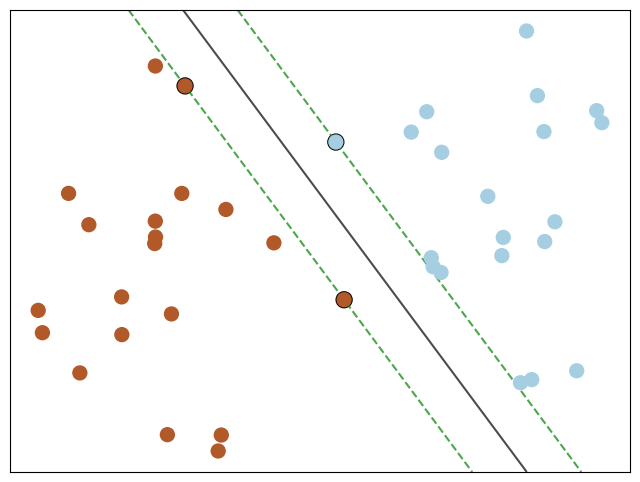

<Figure size 640x480 with 0 Axes>

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
plt.style.use('default')

# --- 1. Create the Dataset ---
# We use make_blobs to create two distinct clusters
random_state = np.random.randint(0, 10000)
random_state = 8004 # fix for consistent results
print(f"Random state used for dataset generation: {random_state}")
X, y = make_blobs(n_samples=40, centers=2, random_state=random_state, cluster_std=2, center_box=(-5.0, 5.0))

# --- 2. Create and Fit the Model ---
# We use a linear kernel and a very high C value
# High C = Hard Margin (low tolerance for misclassification)
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

# --- 3. Plot the Visualization ---
plt.figure(figsize=(8, 6))
# Plot the data points, colored by their class
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.Paired, zorder=10)

# Get the current plot axes to set limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a mesh grid to evaluate the model on
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Get the decision function values for all points in the grid
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot the optimal hyperplane (decision boundary) and margins
# make the margin (dashed) lines green, keep the central hyperplane black
ax.contour(XX, YY, Z, colors=['g', 'k', 'g'], levels=[-1, 0, 1], alpha=0.7,
           linestyles=['--', '-', '--'])

# Highlight the support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120,
           linewidth=1.5, facecolors='none', edgecolors='k')

# Remove axis numbers / ticks (no scaling numbers shown)
ax.set_xticks([])
ax.set_yticks([])

plt.show()
# save figure as a pdf
plt.savefig("hard-margin.pdf")

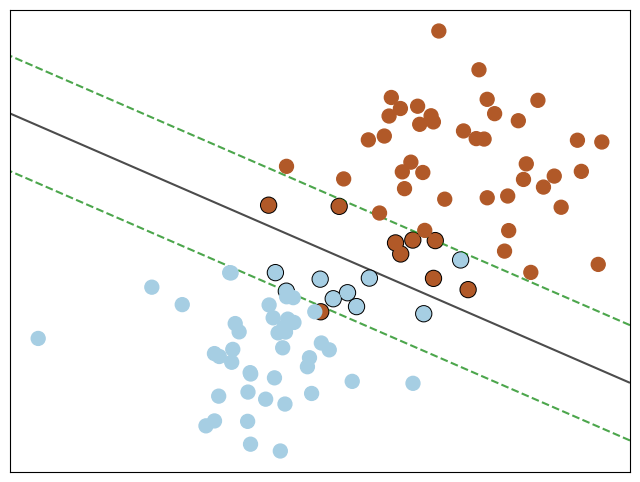

<Figure size 640x480 with 0 Axes>

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
plt.style.use('default')

# --- 1. Create the Dataset ---
# We use make_blobs to create two distinct clusters
random_state = 4901  # fixed for consistent results
X, y = make_blobs(n_samples=100, centers=2, random_state=random_state, cluster_std=1.5)

# --- 2. Create and Fit the Model ---
# We use a linear kernel and a very high C value
# High C = Hard Margin (low tolerance for misclassification)
clf = svm.SVC(kernel='linear', C=0.1)
clf.fit(X, y)

# --- 3. Plot the Visualization ---
plt.figure(figsize=(8, 6))
# Plot the data points, colored by their class
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.Paired, zorder=10)

# Get the current plot axes to set limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a mesh grid to evaluate the model on
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Get the decision function values for all points in the grid
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot the optimal hyperplane (decision boundary) and margins
# make the margin (dashed) lines green, keep the central hyperplane black
ax.contour(XX, YY, Z, colors=['g', 'k', 'g'], levels=[-1, 0, 1], alpha=0.7,
           linestyles=['--', '-', '--'])

# Highlight the support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120,
           linewidth=1.5, facecolors='none', edgecolors='k')

# Remove axis numbers / ticks (no scaling numbers shown)
ax.set_xticks([])
ax.set_yticks([])

plt.show()
# save figure as a pdf
plt.savefig("hard-margin.pdf")

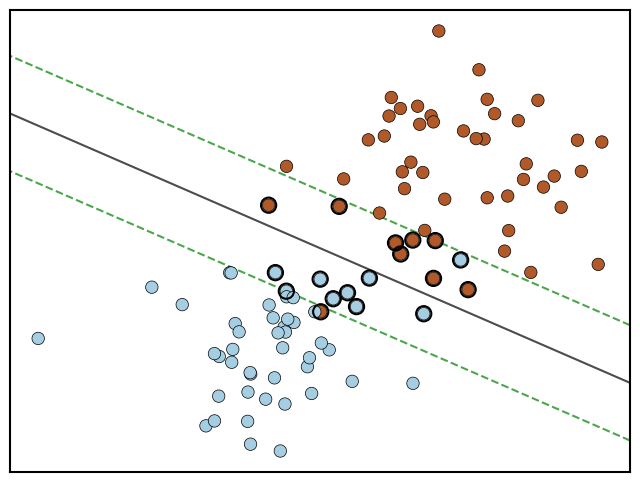

In [156]:
# enforce plain white plotting area with a black box around it
plt.style.use('default')
random_state = 4901  # fixed for consistent results
X, y = make_blobs(n_samples=100, centers=2, random_state=random_state, cluster_std=1.5)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('white')

# draw a solid black box around the plot
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('k')
    spine.set_linewidth(1.5)

ax.tick_params(colors='k')
ax.xaxis.label.set_color('k')
ax.yaxis.label.set_color('k')

# Only plot points outside the margin (or the support vectors)
Z_pts = clf.decision_function(X)
keep = (np.abs(Z_pts) >= 1) | np.isin(np.arange(len(X)), clf.support_)

ax.scatter(X[keep, 0], X[keep, 1], c=y[keep], s=80, cmap=plt.cm.Paired,
           zorder=10, edgecolors='k', linewidths=0.5)

# Create a mesh grid to evaluate the model on
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# decision function on grid and contour (decision boundary + margins)
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors=['g', 'k', 'g'], levels=[-1, 0, 1],
           linestyles=['--', '-', '--'], alpha=0.7)

# Highlight the support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120,
           linewidth=1.5, facecolors='none', edgecolors='k', zorder=11)

ax.set_xticks([])
ax.set_yticks([])

plt.show()


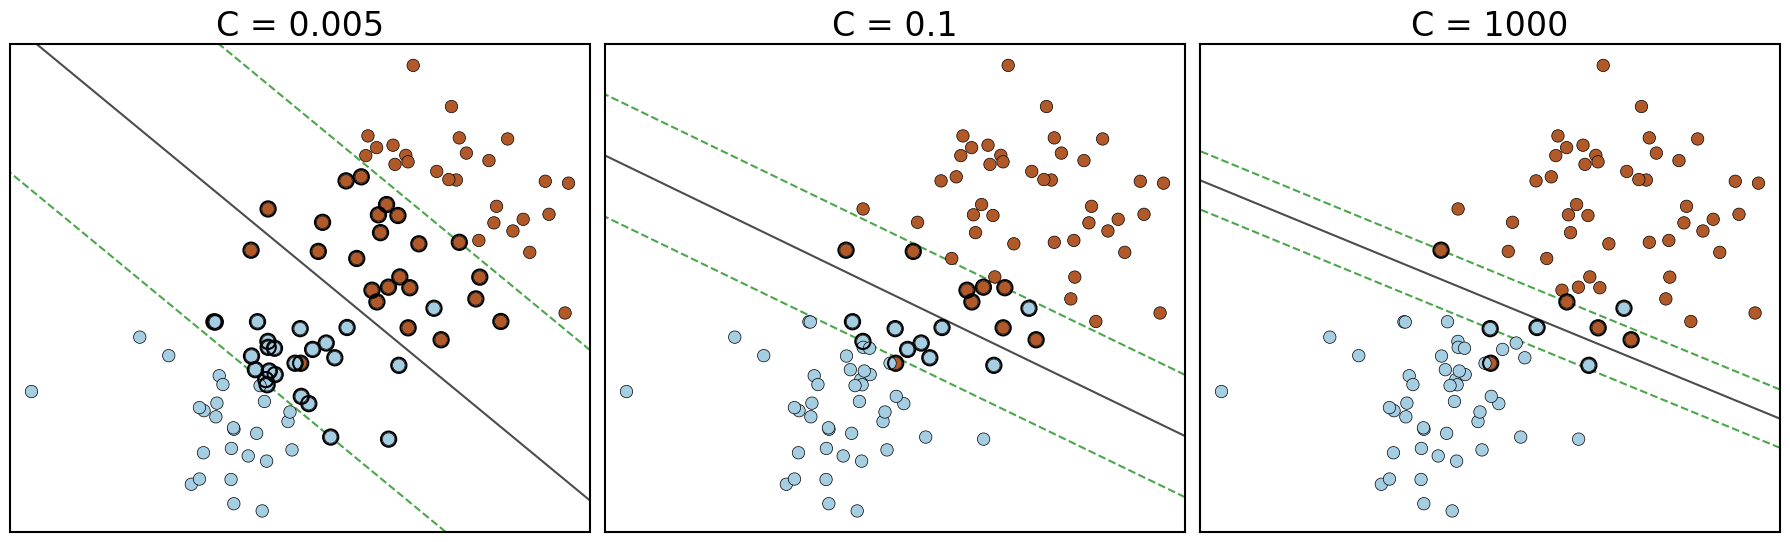

In [157]:
# enforce a white background and black axis boxes regardless of global style
plt.style.use('default')

# Plot the same dataset for three different C values side-by-side
random_state = 4901  # fixed for consistent results
X, y = make_blobs(n_samples=100, centers=2, random_state=random_state, cluster_std=1.5)

C_values = [0.005, 0.1, 1000]
fig, axes = plt.subplots(1, len(C_values), figsize=(18, 6), facecolor='white')
fig.patch.set_facecolor('white')

# common grid for fair comparison
pad = 0.5
x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad
xx = np.linspace(x_min, x_max, 200)
yy = np.linspace(y_min, y_max, 200)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

for ax, C in zip(axes, C_values):
    # ensure each axis has white background
    ax.set_facecolor('white')
    # draw a solid black box around the plot
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('k')
        spine.set_linewidth(1.5)
    ax.tick_params(colors='k')  # tick labels in black
    ax.xaxis.label.set_color('k')
    ax.yaxis.label.set_color('k')

    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X, y)

    Z = clf.decision_function(xy).reshape(XX.shape)
    # decision boundary and margins
    ax.contour(XX, YY, Z, colors=['g', 'k', 'g'], levels=[-1, 0, 1],
               alpha=0.7, linestyles=['--', '-', '--'])

    # points and support vectors
    ax.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=plt.cm.Paired, zorder=10, edgecolors='k', linewidth=0.5)
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120,
               linewidth=1.5, facecolors='none', edgecolors='k', zorder=11)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'C = {C}', fontsize=24, color='k')

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()
# save figure as a pdf
fig.savefig("svm_C.pdf")


Random state used for dataset generation: 5771


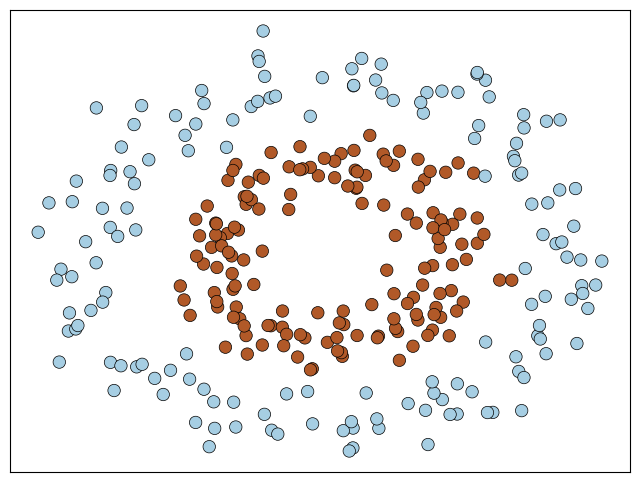

<Figure size 640x480 with 0 Axes>

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_circles

# --- 1. Create the Dataset ---
# make_circles creates data that is not linearly separable
# 'factor' controls the distance between the two circles
random_state = np.random.randint(0, 10000)
print(f"Random state used for dataset generation: {random_state}")
X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=random_state)

# --- 2. Create and Fit the Model ---
# We use the 'rbf' (Radial Basis Function) kernel
# 'gamma' controls the "reach" of a single training example
clf = svm.SVC(kernel='rbf', C=1.0, gamma=1.0)
clf.fit(X, y)

# --- 3. Plot the Visualization ---
plt.figure(figsize=(8, 6))

# Get the current plot axes
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a mesh grid
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Get the *predicted class* (not decision function) for the filled regions
# Z_pred = clf.predict(xy).reshape(XX.shape)

# Plot the decision regions using a filled contour
# ax.contourf(XX, YY, Z_pred, cmap=plt.cm.Paired, alpha=0.3)

# Plot the data points on top
plt.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=plt.cm.Paired, zorder=10,
            edgecolors='k', linewidth=0.5)

# Highlight the support vectors
# ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120,
#            linewidth=1.5, facecolors='none', edgecolors='k', zorder=11)
# remove the axis ticks
ax.set_xticks([])
ax.set_yticks([])

plt.show()
# save figure as a pdf
plt.savefig("non-linear.pdf",format='pdf')

Random state used for dataset generation: 7717


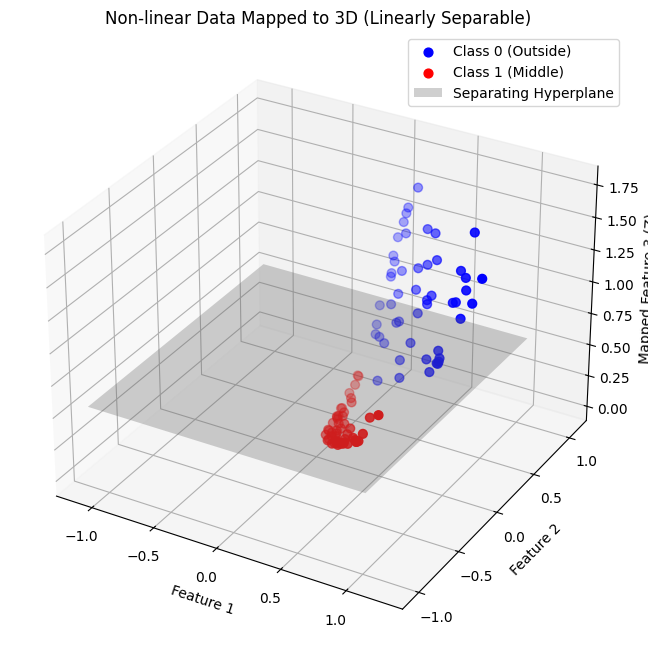

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
# This import is necessary for 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# --- 1. Create the 2D Dataset ---
# Same data as in example 3
random_state = np.random.randint(0, 10000)
print(f"Random state used for dataset generation: {random_state}")
X, y = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=random_state)

# --- 2. Map Data to 3D ---
# We create a new feature 'z' using a a 2d polynomail kernel

# the polynomial kernel function will be (<x, y> + 1)^2
# the equivalent feature mapping is:
z = (X[:, 0]**2 + X[:, 1]**2)**2
# every point (x1, x2) in 2D is mapped to (x1^2, x2^2, z) in 3D
X_new = np.column_stack((X[:, 0]**2,X[:, 1]**2,z))

# z = exp(-(x1^2 + x2^2))
# This maps points close to the origin (0,0) to high z-values (approx 1)
# and points far from the origin to low z-values (approx 0).
# z = np.exp(-(X[:, 0]**2 + X[:, 1]**2))
# z = -X[:, 0]**2 - X[:, 1]**2
# --- 3. Create the 3D Plot ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D data points, colored by their original class
# The 'y==0' class (outer circle) will have low z-values
# The 'y==1' class (inner circle) will have high z-values
ax.scatter(X_new[y==0, 0], X_new[y==0, 1], X_new[y==0, 2], c='b', s=40, label='Class 0 (Outside)')
ax.scatter(X_new[y==1, 0], X_new[y==1, 1], X_new[y==1, 2], c='r', s=40, label='Class 1 (Middle)')

# --- 4. Create the Separating Hyperplane ---
# In this new 3D space, a simple horizontal plane can separate the data.
# We find a z-value (height) that is halfway between the two classes.
z_class0_mean = X_new[y==0, 2].mean()
z_class1_mean = X_new[y==1, 2].mean()
z_hyperplane = (z_class0_mean + z_class1_mean) / 2

# Create a meshgrid for the x and y dimensions to draw the plane
x_grid = np.linspace(X[:, 0].min(), X[:, 0].max(), 20)
y_grid = np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
XX, YY = np.meshgrid(x_grid, y_grid)

# Create the Z values for the plane (all are the same height)
ZZ = np.full(XX.shape, z_hyperplane)

# Plot the transparent hyperplane
ax.plot_surface(XX, YY, ZZ, alpha=0.3, color='gray', rstride=100, cstride=100,
                label='Separating Hyperplane')

# --- 5. Customize the Plot ---
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Mapped Feature 3 (Z)')
ax.set_title('Non-linear Data Mapped to 3D (Linearly Separable)')
ax.legend()
plt.show()

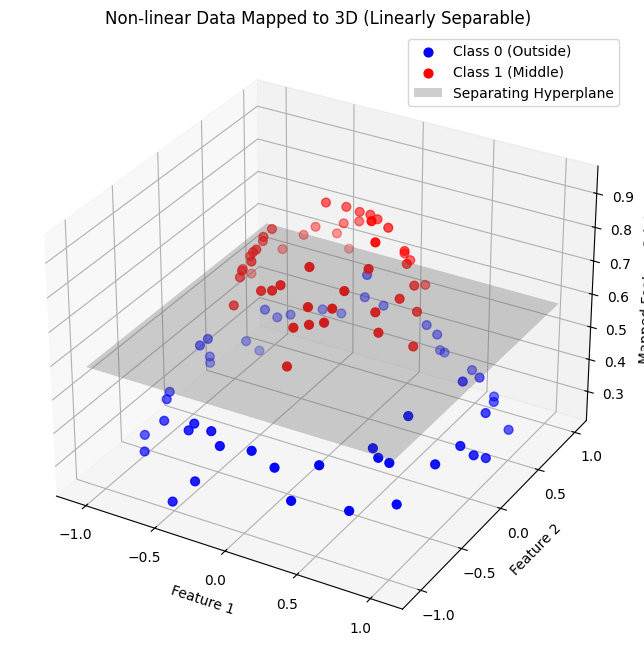

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
# This import is necessary for 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# --- 1. Create the 2D Dataset ---
# Same data as in example 3
X, y = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=1)

# --- 2. Map Data to 3D ---
# We create a new feature 'z' using a function similar to the RBF kernel
# z = exp(-(x1^2 + x2^2))
# This maps points close to the origin (0,0) to high z-values (approx 1)
# and points far from the origin to low z-values (approx 0).
z = np.exp(-(X[:, 0]**2 + X[:, 1]**2))

# --- 3. Create the 3D Plot ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D data points, colored by their original class
# The 'y==0' class (outer circle) will have low z-values
# The 'y==1' class (inner circle) will have high z-values
ax.scatter(X[y==0, 0], X[y==0, 1], z[y==0], c='b', s=40, label='Class 0 (Outside)')
ax.scatter(X[y==1, 0], X[y==1, 1], z[y==1], c='r', s=40, label='Class 1 (Middle)')

# --- 4. Create the Separating Hyperplane ---
# In this new 3D space, a simple horizontal plane can separate the data.
# We find a z-value (height) that is halfway between the two classes.
z_class0_mean = z[y==0].mean()
z_class1_mean = z[y==1].mean()
z_hyperplane = (z_class0_mean + z_class1_mean) / 2

# Create a meshgrid for the x and y dimensions to draw the plane
x_grid = np.linspace(X[:, 0].min(), X[:, 0].max(), 20)
y_grid = np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
XX, YY = np.meshgrid(x_grid, y_grid)

# Create the Z values for the plane (all are the same height)
ZZ = np.full(XX.shape, z_hyperplane)

# Plot the transparent hyperplane
ax.plot_surface(XX, YY, ZZ, alpha=0.3, color='gray', rstride=100, cstride=100,
                label='Separating Hyperplane')

# --- 5. Customize the Plot ---
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Mapped Feature 3 (Z)')
ax.set_title('Non-linear Data Mapped to 3D (Linearly Separable)')
ax.legend()
plt.show()

<>:62: SyntaxWarning: invalid escape sequence '\s'
<>:62: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_342898/249598301.py:62: SyntaxWarning: invalid escape sequence '\s'
  ax.set_zlabel('$\sqrt{2}x_1x_2$ (Feature 3)')


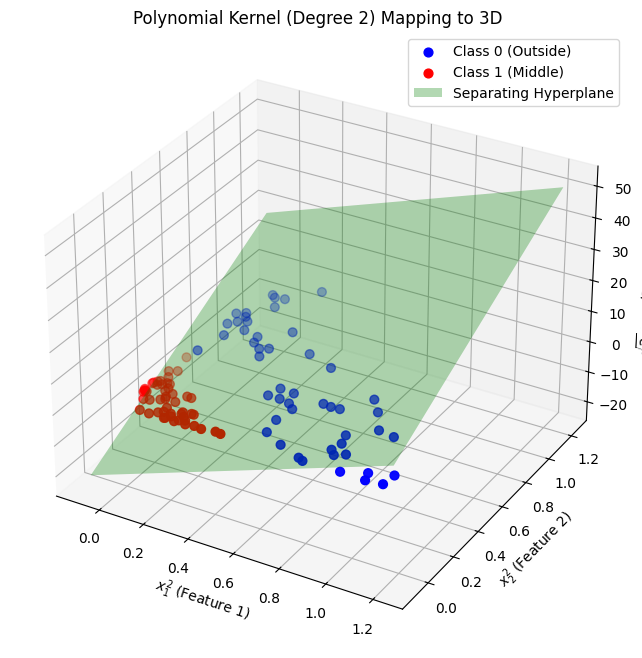

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

# --- 1. Create the 2D Dataset ---
# Same data as in example 3 and 4
X_2d, y = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=1)

# --- 2. Map Data to 3D using the Polynomial Degree 2 Feature Map ---
# The mapping function is phi(x1, x2) = (x1^2, x2^2, sqrt(2)*x1*x2)
x1_squared = X_2d[:, 0]**2
x2_squared = X_2d[:, 1]**2
sqrt_2_x1_x2 = np.sqrt(2) * X_2d[:, 0] * X_2d[:, 1]

# Combine these into our new 3D feature space
X_3d = np.vstack((x1_squared, x2_squared, sqrt_2_x1_x2)).T

# --- 3. Create the 3D Plot ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D data points, colored by their original class
ax.scatter(X_3d[y==0, 0], X_3d[y==0, 1], X_3d[y==0, 2], c='b', s=40, label='Class 0 (Outside)')
ax.scatter(X_3d[y==1, 0], X_3d[y==1, 1], X_3d[y==1, 2], c='r', s=40, label='Class 1 (Middle)')

# --- 4. Find and Plot the Separating Hyperplane in 3D ---
# In this 3D space, the data *is* linearly separable.
# We can use a linear SVM to find the separating plane.
# NOTE: The C parameter here applies to the *linear* separation in this 3D space.
clf_linear_in_3d = svm.SVC(kernel='linear', C=1.0)
clf_linear_in_3d.fit(X_3d, y)

# Get the coefficients and intercept of the hyperplane
# The equation of the plane is: w[0]*x_dim1 + w[1]*x_dim2 + w[2]*x_dim3 + intercept = 0
w = clf_linear_in_3d.coef_[0]
b = clf_linear_in_3d.intercept_[0]

# Create a meshgrid for the first two dimensions of the 3D space
xx_grid = np.linspace(X_3d[:, 0].min() - 0.1, X_3d[:, 0].max() + 0.1, 20)
yy_grid = np.linspace(X_3d[:, 1].min() - 0.1, X_3d[:, 1].max() + 0.1, 20)
XX_grid, YY_grid = np.meshgrid(xx_grid, yy_grid)

# Calculate the Z values for the hyperplane using the plane equation:
# z_dim3 = (-w[0]*x_dim1 - w[1]*x_dim2 - intercept) / w[2]
# We need to handle the case where w[2] might be zero, though unlikely for a good separation.
if w[2] != 0:
    ZZ_grid = (-w[0] * XX_grid - w[1] * YY_grid - b) / w[2]
else:
    # If w[2] is zero, the plane is parallel to the z-axis, which is unlikely for this separation
    # A more robust approach would be needed for general cases.
    ZZ_grid = np.full(XX_grid.shape, X_3d[:, 2].mean()) # fallback to a mean plane

# Plot the transparent hyperplane
ax.plot_surface(XX_grid, YY_grid, ZZ_grid, alpha=0.3, color='green', rstride=100, cstride=100,
                label='Separating Hyperplane')

# --- 5. Customize the Plot ---
ax.set_xlabel('$x_1^2$ (Feature 1)')
ax.set_ylabel('$x_2^2$ (Feature 2)')
ax.set_zlabel('$\sqrt{2}x_1x_2$ (Feature 3)')
ax.set_title('Polynomial Kernel (Degree 2) Mapping to 3D')
ax.legend()
plt.show()

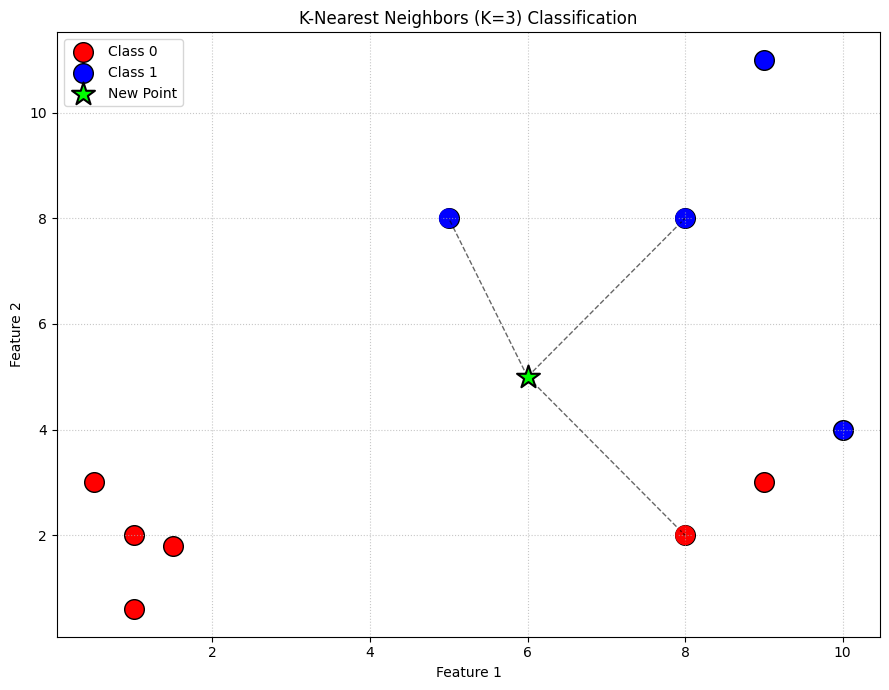

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# --- 1. Define Existing Data Points and Their Classes ---
# Each row is a 2D point [x, y]
X_existing = np.array([
    [1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6],
    [9, 11], [8, 2], [10, 4], [9, 3], [0.5, 3]
])
# Corresponding classes (0 or 1)
y_existing = np.array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

# --- 2. Define the New Point to be Classified ---
new_point = np.array([6, 5])

# --- 3. Find the K Nearest Neighbors ---
k = 3
# Create a NearestNeighbors model
nn = NearestNeighbors(n_neighbors=k)
# Fit it to the existing data
nn.fit(X_existing)
# Find the k nearest neighbors to the new point
# Returns distances and indices of the neighbors
distances, indices = nn.kneighbors(new_point.reshape(1, -1))

# Get the actual neighbor points
nearest_neighbors = X_existing[indices[0]]
nearest_neighbors_classes = y_existing[indices[0]]

# --- 4. Plotting the Visualization ---
plt.figure(figsize=(9, 7))

# Plot existing data points
plt.scatter(X_existing[y_existing == 0, 0], X_existing[y_existing == 0, 1],
            c='red', s=200, label='Class 0', edgecolors='k')
plt.scatter(X_existing[y_existing == 1, 0], X_existing[y_existing == 1, 1],
            c='blue', s=200, label='Class 1', edgecolors='k')

# Plot the new point
plt.scatter(new_point[0], new_point[1], c='lime', s=300, marker='*',
            label='New Point', edgecolors='k', linewidth=1.5, zorder=5)

# Plot lines to the 3 nearest neighbors
for i in range(k):
    neighbor_point = nearest_neighbors[i]
    plt.plot([new_point[0], neighbor_point[0]],
             [new_point[1], neighbor_point[1]],
             'k--', alpha=0.6, linewidth=1) # Black dashed lines

    # Optionally, highlight the neighbors with a distinct marker/color
    # This shows which points are being connected
    color_neighbor = 'red' if nearest_neighbors_classes[i] == 0 else 'blue'
    plt.scatter(neighbor_point[0], neighbor_point[1],
                s=150, facecolors='none', edgecolors=color_neighbor, linewidth=2, zorder=6,
                marker='o')

plt.title(f'K-Nearest Neighbors (K={k}) Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

Random state used for dataset generation: 1158


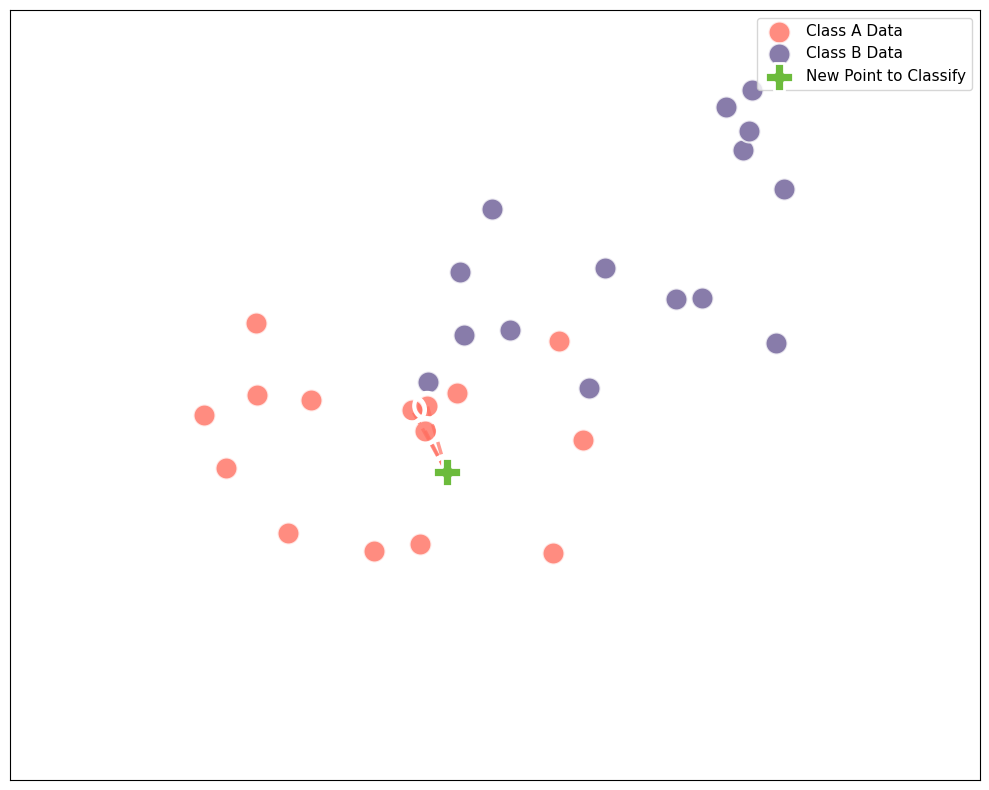

<Figure size 640x480 with 0 Axes>

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# --- 1. Define Existing Data Points and Their Classes (closer together) ---
random_state = np.random.randint(0, 10000)
np.random.seed(random_state) # for reproducibility
print(f"Random state used for dataset generation: {random_state}")
# Class 0 points (e.g., lower-left cluster)
X0 = np.random.rand(15, 2) * 4 + np.array([2, 2])
y0 = np.zeros(15, dtype=int)

# Class 1 points (e.g., upper-right cluster)
X1 = np.random.rand(15, 2) * 4 + np.array([4, 5])
y1 = np.ones(15, dtype=int)

X_existing = np.vstack((X0, X1))
y_existing = np.hstack((y0, y1))

# --- 2. Define the New Point to be Classified (somewhere in between) ---
new_point = np.array([4.5, 4])

# --- 3. Find the K Nearest Neighbors ---
k = 3
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_existing)
distances, indices = nn.kneighbors(new_point.reshape(1, -1))

nearest_neighbors = X_existing[indices[0]]
nearest_neighbors_classes = y_existing[indices[0]]

# --- 4. Plotting the Visualization (Enhanced Aesthetics) ---
plt.figure(figsize=(10, 8))
plt.style.use('default') # Use a nice style for better aesthetics
# Set a custom color palette
class_colors = {0: '#FF6F61', 1: '#6B5B95'} # Coral and Royal Purple
new_point_color = '#6CBB3C' # A vibrant green

# Plot existing data points
plt.scatter(X_existing[y_existing == 0, 0], X_existing[y_existing == 0, 1],
            c=class_colors[0], s=250, label='Class A Data', alpha=0.8, edgecolors='white', linewidth=1.5)
plt.scatter(X_existing[y_existing == 1, 0], X_existing[y_existing == 1, 1],
            c=class_colors[1], s=250, label='Class B Data', alpha=0.8, edgecolors='white', linewidth=1.5)

# Plot the new point
plt.scatter(new_point[0], new_point[1], c=new_point_color, s=400, marker='P', # 'P' for filled pentagon
            label='New Point to Classify', edgecolors='white', linewidth=2, zorder=5)

# Plot lines to the 3 nearest neighbors
for i in range(k):
    neighbor_point = nearest_neighbors[i]
    neighbor_class = nearest_neighbors_classes[i]
    line_color = class_colors[neighbor_class] # Line color matches neighbor's class
    
    plt.plot([new_point[0], neighbor_point[0]],
             [new_point[1], neighbor_point[1]],
             color=line_color, linestyle='--', alpha=0.7, linewidth=2.5, zorder=4)

    # Highlight the connected neighbors with a thicker white border to make them stand out
    plt.scatter(neighbor_point[0], neighbor_point[1],
                s=350, facecolors='none', edgecolors='white', linewidth=3, zorder=6)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xticks([]) # Hide x-axis ticks for cleaner look
plt.yticks([]) # Hide y-axis ticks for cleaner look
plt.tight_layout()
plt.show()
# save figure as a pdf
plt.savefig("knn_enhanced.pdf",)

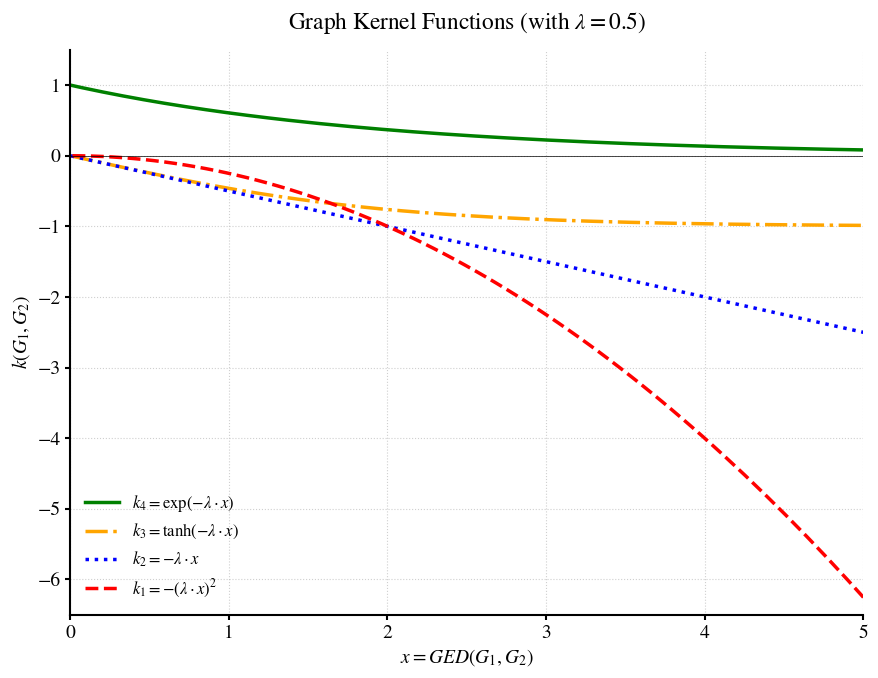

In [164]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Set up Matplotlib for Publication Quality ---
# Use a common serif font that looks good in papers
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 1.5 # Make axis lines a bit thicker
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['lines.linewidth'] = 2.5 # Make function lines thicker
plt.rcParams['mathtext.fontset'] = 'stix' # Ensure math fonts match

# --- 2. Define the Functions and Parameters ---
lambda_val = 0.5 # Example value for lambda
x_ged = np.linspace(-3, 10, 200) # GED (distance) is >= 0. Plot from 0 to 5.

# Calculate the k values for each function
k1 = -(lambda_val * x_ged)**2
k2 = -lambda_val * x_ged
k3 = np.tanh(-lambda_val * x_ged)
k4 = np.exp(-lambda_val * x_ged)

# --- 3. Create the Plot ---
plt.figure(figsize=(9, 7)) # Adjust size as needed
ax = plt.gca()

# Plot the four functions with distinct styles
ax.plot(x_ged, k4, color='green', linestyle='-', 
        label=r'$k_4 = \exp(-\lambda \cdot x)$')
ax.plot(x_ged, k3, color='orange', linestyle='-.', 
        label=r'$k_3 = \tanh(-\lambda \cdot x)$')
ax.plot(x_ged, k2, color='blue', linestyle=':', 
        label=r'$k_2 = -\lambda \cdot x$')
ax.plot(x_ged, k1, color='red', linestyle='--', 
        label=r'$k_1 = -(\lambda \cdot x)^2$')

# --- 4. Customize and Style the Plot ---
# Add a horizontal line at y=0 for reference
ax.axhline(0, color='black', linewidth=0.5)

# Set titles and labels using LaTeX rendering
ax.set_title(fr'Graph Kernel Functions (with $\lambda={lambda_val}$)', pad=15)
ax.set_xlabel(r'$x = GED(G_1, G_2)$')
ax.set_ylabel(r'$k(G_1, G_2)$')

# Set axis limits for a clean view
ax.set_xlim(0, 5)
ax.set_ylim(-6.5, 1.5) # k1(5) = -(0.5*5)^2 = -6.25

# Add legend
ax.legend(loc='lower left', frameon=False, fontsize=12)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a light grid
ax.grid(True, linestyle=':', alpha=0.6)

# Ensure everything fits
plt.tight_layout()

# --- 5. Save the Publication-Quality File ---
# This saves a crisp vector graphic, ideal for your thesis
plt.savefig('graph_kernel_functions.pdf', format='pdf', dpi=300)

plt.show()